### k-최근접 이웃 회귀
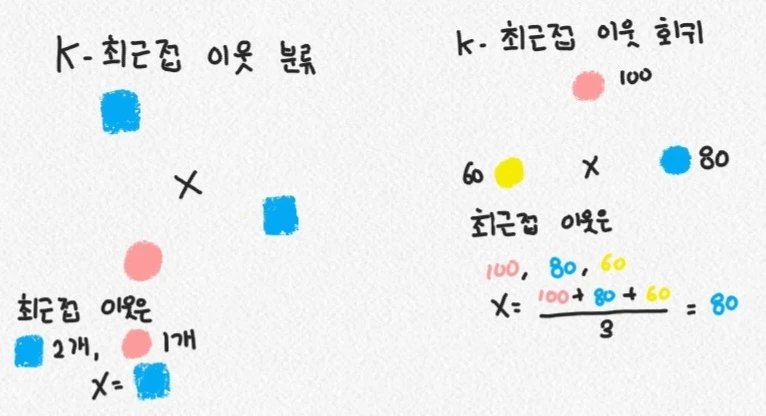

### 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 농어의 길이만 사용

In [2]:
import matplotlib.pyplot as plt

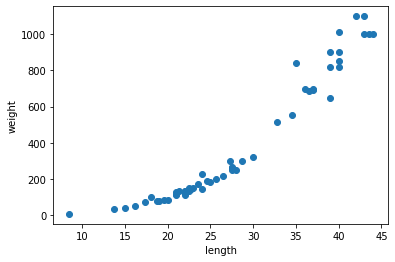

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트 준비

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

길이 하나만 사용하기 위해 2차원 배열로 변경

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### 회귀 모델 훈련

예측이 평균정도만 예측하면 결정계수가 0에 가까워져서 좋지 않고,    
예측이 타킷을 정확히 예측한다면 결정계수가 1에 가까워져서 좋다.

> $\ R^2 = 1 - {{(타깃 - 예측)^2의\ 합}\over {(타깃 - 평균)^2의\ 합}}$



In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


평균제곱근 오차를 사용하여 예측을 잘했는지 확인

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


### 과대적합과 과소적합
과대적합(overfitting) : 훈련세트의 점수가 테스트세트 점수보다 훨씬 높다.        
(훈련세트 점수 : 0.99, 테스트세트 점수 : 0.6)    
과소적합(underfitting) : 훈련세트의 점수가 테스트세트 점수보다 낮다    


현재 모델은 과소적합이다.

In [11]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


### 이웃 개수 조절

> 이웃의 개수⬆️ : 과소적합     
이웃의 개수⬇️ : 과대적합

knr.n_neighbors를 사용하여 이웃의 개수를 조 절할 수 있다.

In [12]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [13]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


### 이웃의 개수별 예측 결과 그래프 그리기

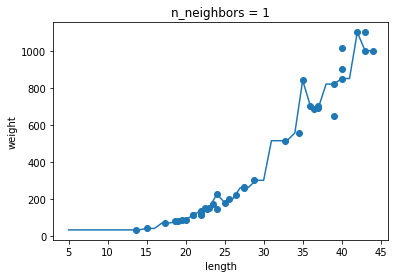

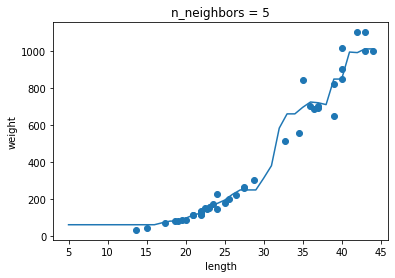

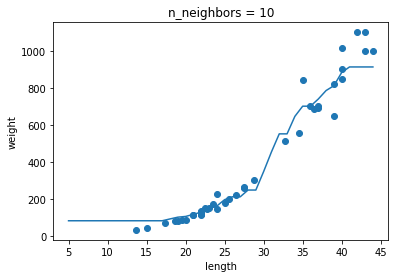

In [14]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()
# 5에서 45까지 x좌표 생성
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그리기
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()